# Homework 2


##  2

In [1]:
from mnist_helper import MNIST
import os
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np

In [2]:
path = os.getcwd()

mnist = MNIST(path)

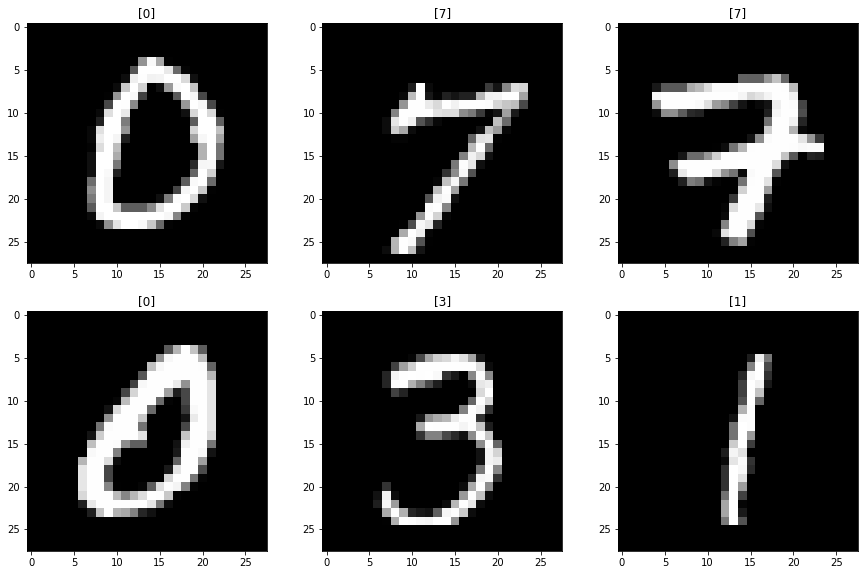

In [3]:
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(3, 3, i+1)
    image = next(iter(mnist.get_training_batch(1)))
    plt.imshow(image[0].reshape(28,28), cmap='Greys_r')
    plt.title(image[1])

In [49]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.int64, [None, 10])
W = tf.Variable(tf.random_normal([784, 10], stddev=0.000002))
b = tf.Variable(tf.zeros(10))

out = tf.matmul(x, W) + b
loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out, labels=y))
train = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(out,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tr_batch_size = 100
val_batch_size = 100

tr_losses, val_losses, test_losses, val_accuracies = [], [], [], []
epochs = 3
step = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epochs):
        print(i)
        for tr_batch in iter(mnist.get_training_batch(tr_batch_size)):
            x_tr = tr_batch[0].reshape(len(tr_batch[0]), 784)
            y_tr = []
            for label in tr_batch[1]:
                b = np.zeros(10)
                b[label] = 1
                y_tr.append(b)
                
            tr_losses.append(sess.run(loss, feed_dict={x: x_tr, y: y_tr}))
            sess.run(train, feed_dict={x: x_tr, y: y_tr})
            step += 1
            
            val_batch = next(iter(mnist.get_validation_batch(val_batch_size)))
            x_val = val_batch[0].reshape(len(val_batch[0]), 784)
            y_val = []
            for label in val_batch[1]:
                b = np.zeros(10)
                b[label] = 1
                y_val.append(b)
                
            val_losses.append(sess.run(loss, feed_dict={x: x_val, y: y_val}))
            val_accuracies.append(sess.run(accuracy, feed_dict={x: x_val, y: y_val}))


0
1
2


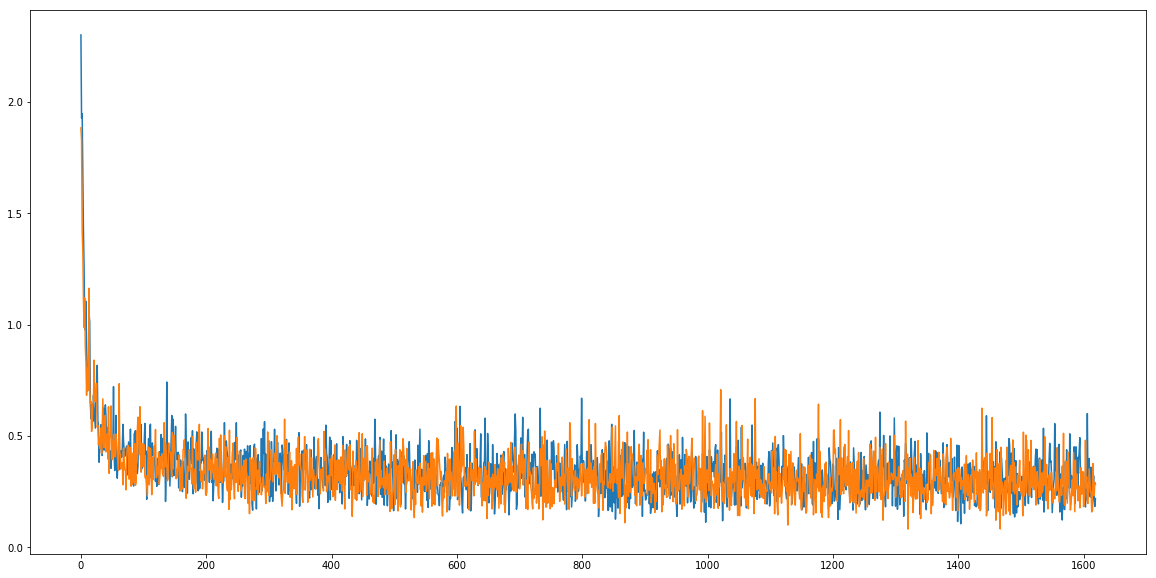

In [48]:
plt.figure(figsize=(20,10))
plt.plot(np.asarray(tr_losses))
plt.plot(np.arange(len(tr_losses)), np.asarray(val_losses))

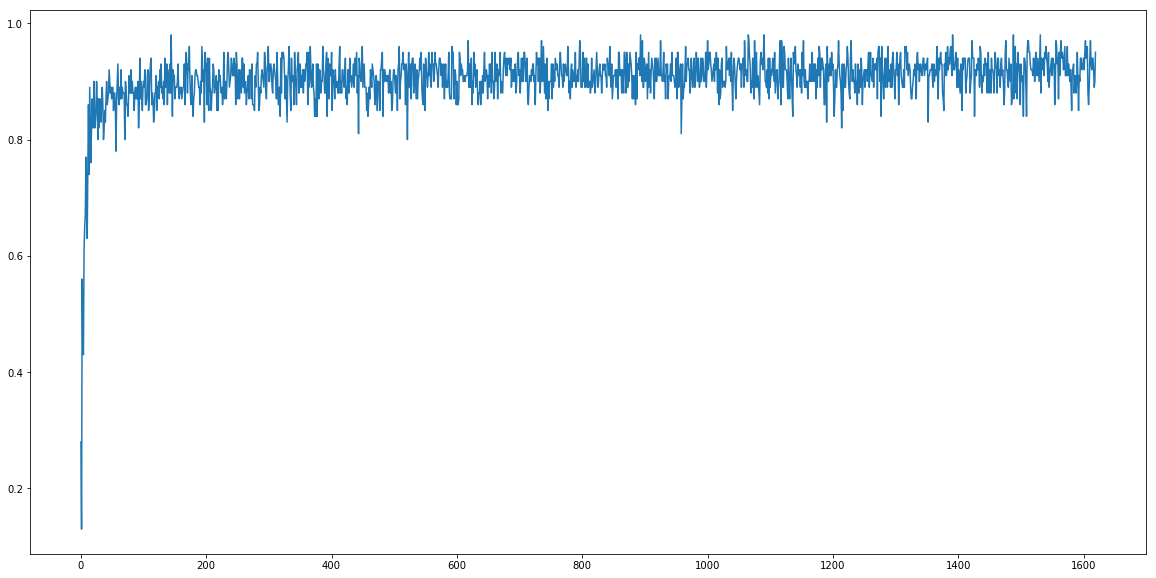

In [50]:
plt.figure(figsize=(20,10))
plt.plot(np.asarray(val_accuracies))